<a href="https://colab.research.google.com/github/coraline1111/Lab-work-Saturday/blob/Branch-1.0/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final project - Store sales and profit analysis

objective: predict


In [2]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')

In [3]:
# load dataset
file_path = "/content/Storedata.xlsx"
data = pd.read_excel(file_path)

In [4]:
# take a look at the dataset
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Get the distinct values in the column "Country" - to see if there are all the same, if so then we can get rid of it
distinct_values = data['Country'].unique()

# Print the distinct values
print(distinct_values)


['United States']


In [6]:
# Drop columns Country and Customer name because they dont have effect on the analysis we are trying to do
dropcolumn = ['Country', 'Customer Name']
data.drop(dropcolumn, axis=1, inplace=True)

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
data.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,2017-03-03 00:00:00,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,2017-03-03 00:00:00,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,2017-03-03 00:00:00,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-04-05 00:00:00,2017-09-05 00:00:00,Second Class,CC-12220,Consumer,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [9]:
data.shape

(9994, 19)

In [10]:
data.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   City          9994 non-null   object 
 8   State         9994 non-null   object 
 9   Postal Code   9994 non-null   int64  
 10  Region        9994 non-null   object 
 11  Product ID    9994 non-null   object 
 12  Category      9994 non-null   object 
 13  Sub-Category  9994 non-null   object 
 14  Product Name  9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [13]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
# understanding the categorical features
cat_features = [f for f in data.columns if(data[f].dtype=='O')]
data[cat_features].describe()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,3,531,49,4,1862,3,17,1850
top,CA-2017-100111,2016-05-09 00:00:00,12/16/2015,Standard Class,WB-21850,Consumer,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,5191,915,2001,3203,19,6026,1523,48


In [15]:
# Have a look at number of unique values in each category
for c in cat_features:
    print(c , ":" ,data[c].nunique())

Order ID : 5009
Order Date : 1237
Ship Date : 1334
Ship Mode : 4
Customer ID : 793
Segment : 3
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


# Part 1 Data visulization

***Starting with taking a look at Category***

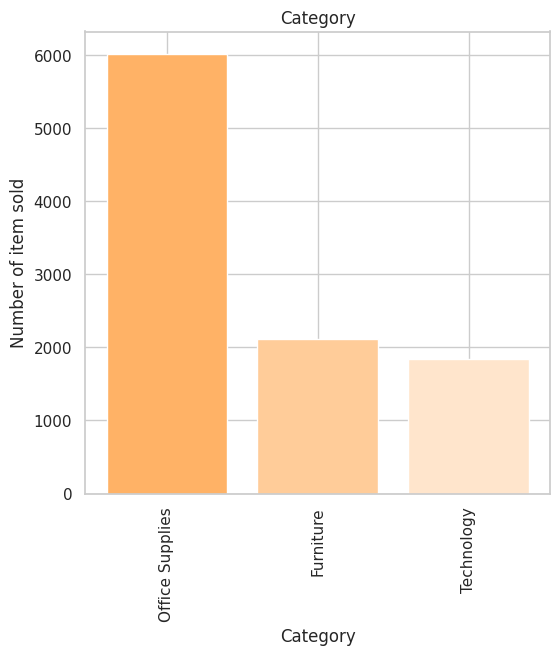

In [16]:
category_counts = data['Category'].value_counts()
custom_palette = ['#FFB266', '#FFCC99', '#FFE5CC']

# Create the bar chart
plt.figure(figsize=(6, 6))  # Set the size of the plot
plt.bar(category_counts.index, category_counts.values, color=custom_palette)
plt.xlabel('Category')
plt.ylabel('Number of item sold')
plt.title('Category')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

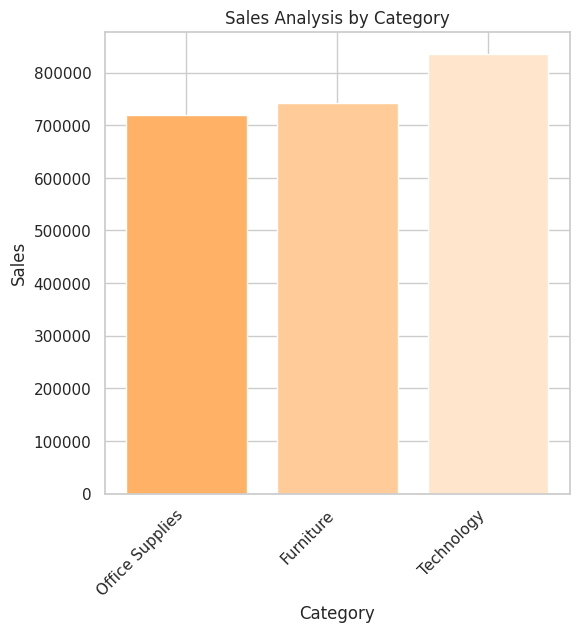

In [17]:
# The above  data visulization shows 'number of items sold per category' we also want to have a look at the sales per category as well as profit

# We want to easliy compare the Sales and the items  solde so we will be placing the same order as shown in number sold
category_order = ["Office Supplies", "Furniture", "Technology"]
data['Category'] = pd.Categorical(data['Category'], categories=category_order, ordered=True)

# dont forget to reset otherwise the grouped column becomes the new index of the DataFrame
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
custom_palette = ['#FFB266', '#FFCC99', '#FFE5CC']


# Create the bar chart
plt.figure(figsize=(6, 6))
plt.bar(sales_by_category['Category'], sales_by_category['Sales'], color=custom_palette)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales Analysis by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.show()

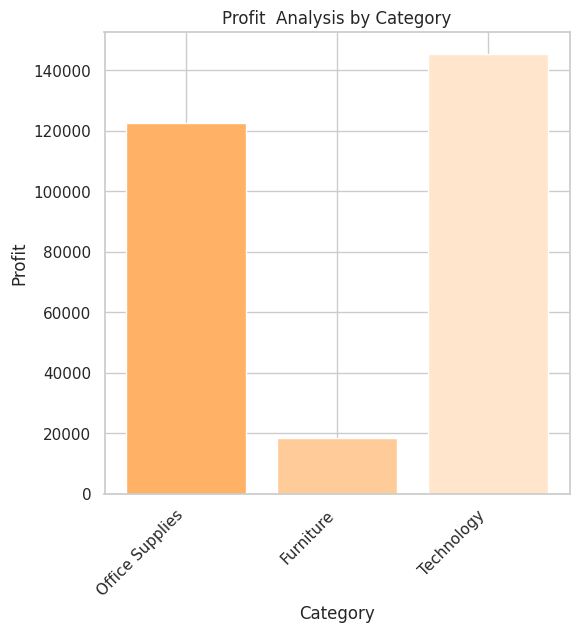

In [18]:
# we will now take a look at profit

# We want to easliy compare the Sales and the items  solde so we will be placing the same order as shown in number sold
category_order = ["Office Supplies", "Furniture", "Technology"]
data['Category'] = pd.Categorical(data['Category'], categories=category_order, ordered=True)

profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()
custom_palette = ['#FFB266', '#FFCC99', '#FFE5CC']

# Create the bar chart
plt.figure(figsize=(6, 6))
plt.bar(profit_by_category['Category'], profit_by_category['Profit'], color=custom_palette)
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit  Analysis by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.show()

Interesting to see that
the most number of item sold category doesn't have the most sales
Even though Technology has the least number of item sold, it has the most sales as well as the profit

***We will now have a look at monthly sales***


In [19]:
# Because this dataset didn't give a monthly sales column so we will have to create one ourselves
# Luckly this datatset gives an order time, which means using the order time, we will be able to calculate the order month, year and date
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

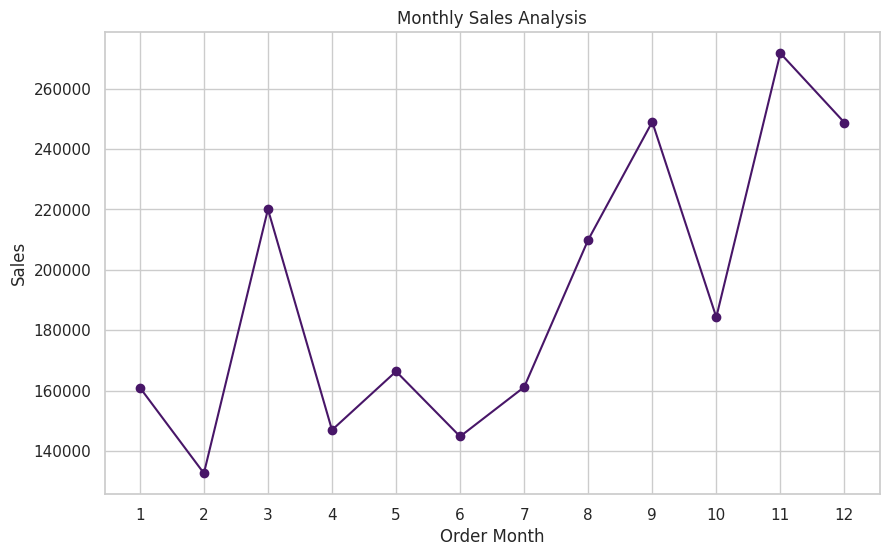

In [87]:
# We will visulize the monthly sales now
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
# Set the size of the plot
plt.figure(figsize=(10, 6))

plt.plot(sales_by_month['Order Month'], sales_by_month['Sales'], marker='o')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Analysis')

plt.xticks(range(1, 13))  # Assuming the 'Order Month' values are from 1 to 12 (January to December)

plt.grid(True)  # Add gridlines
plt.show()

# We can use the month instead of the number by adding month_names = [calendar.month_abbr[i] for i in range(1, 13)],
# however, I thought leaving them as numbers would be easier for later analysts

We can see that the month had the most sales is November, and this could be because Christmas is in December and consumers are making more pruchases to prepare for Christmas.
But it could be also related to the discount that the store is giving.

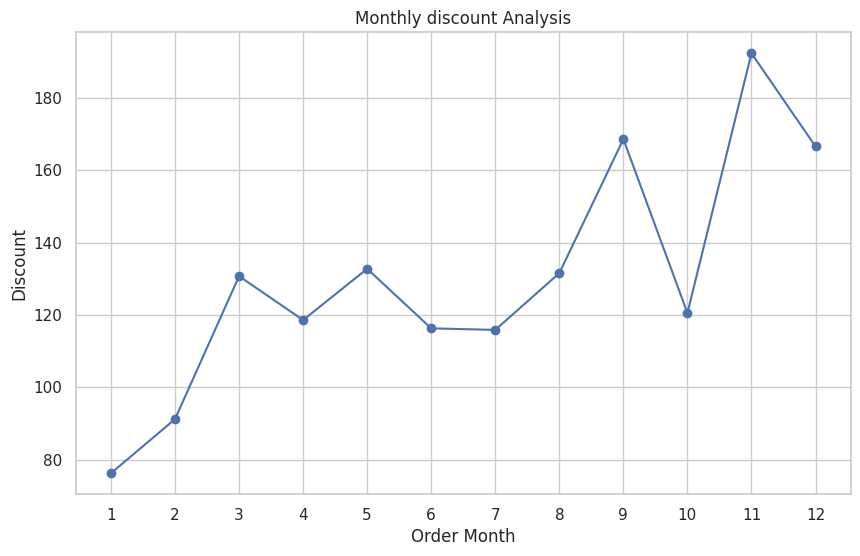

In [21]:
# Let's have a look at the discount trend
discount_by_month = data.groupby('Order Month')['Discount'].sum().reset_index()
# Set the size of the plot
plt.figure(figsize=(10, 6))

plt.plot(discount_by_month['Order Month'], discount_by_month['Discount'], marker='o')
plt.xlabel('Order Month')
plt.ylabel('Discount')
plt.title('Monthly discount Analysis')

plt.xticks(range(1, 13))  # Assuming the 'Order Month' values are from 1 to 12 (January to December)

plt.grid(True)
plt.show()

Good to see that discount has similar trend as sales data.

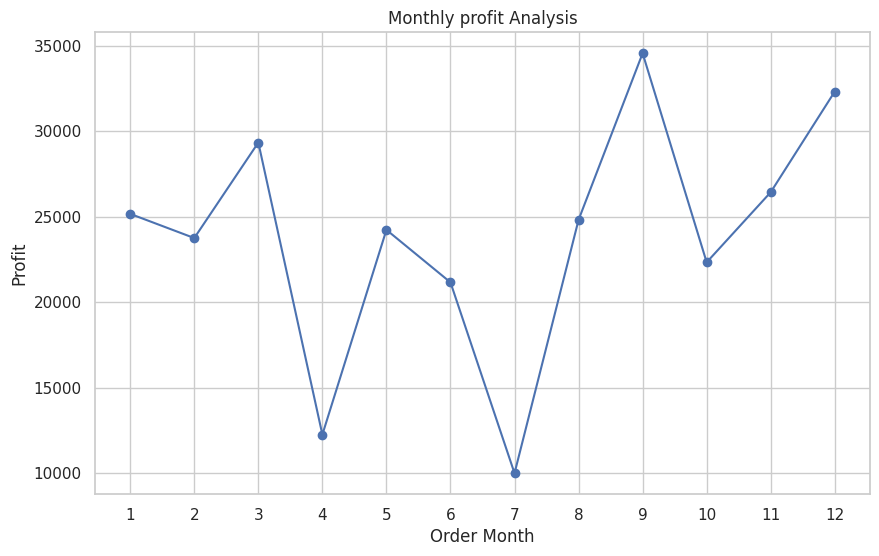

In [22]:
# Now we have a look at monthly profit
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()

# Set the size of the plot
plt.figure(figsize=(10, 6))

plt.plot(profit_by_month['Order Month'], profit_by_month['Profit'], marker='o')
plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Monthly profit Analysis')

plt.xticks(range(1, 13))  # Assuming the 'Order Month' values are from 1 to 12 (January to December)

plt.grid(True)
plt.show()

Interesting to see even though November has the most sales but September has the most profile.
And the reason could be because a lot of discounts were offered in November which drow down the profit.

***We are interesting to see what else would effect sales and want to get a general look at the correlation between varibales***

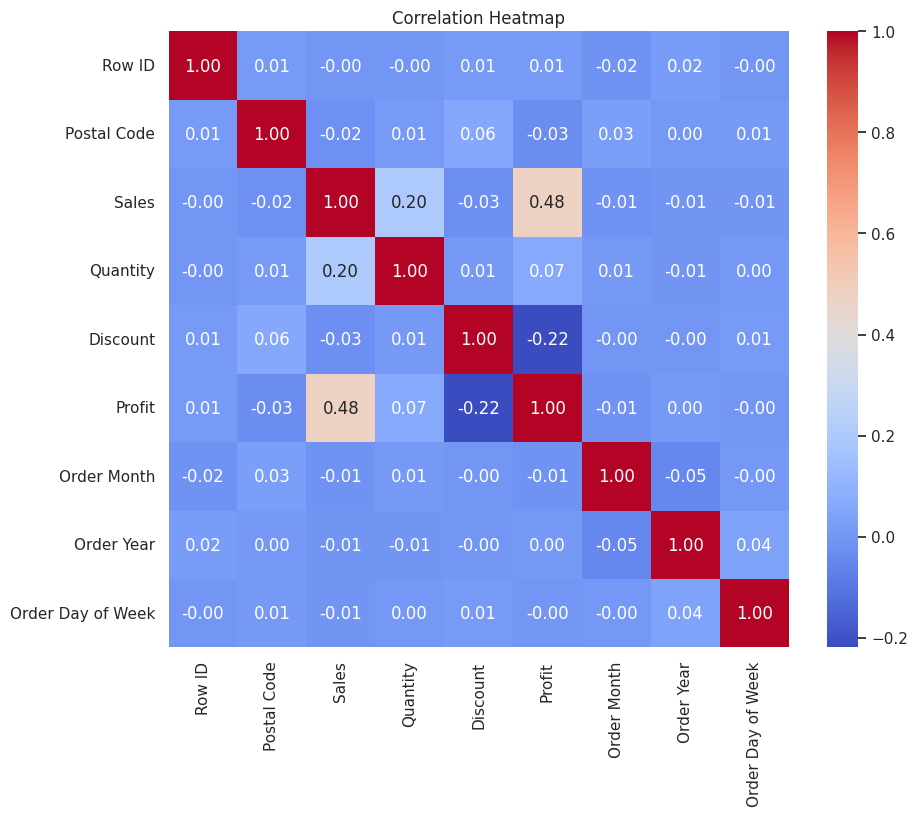

In [23]:
# Producing a heat map
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Use a diverging colormap
plt.title('Correlation Heatmap')
plt.show()

It was interesting to see the correlation
We can see that Sales and Profit has a positive co-relationship and it seems that Profit and Discount has a negative co-relationship.

Besides those two, there is also a relationship between Quantity and Sales, but it is not that obvious and this could be because cheaper units are selling at lower prices and the more expensive units are selling at higher prices.

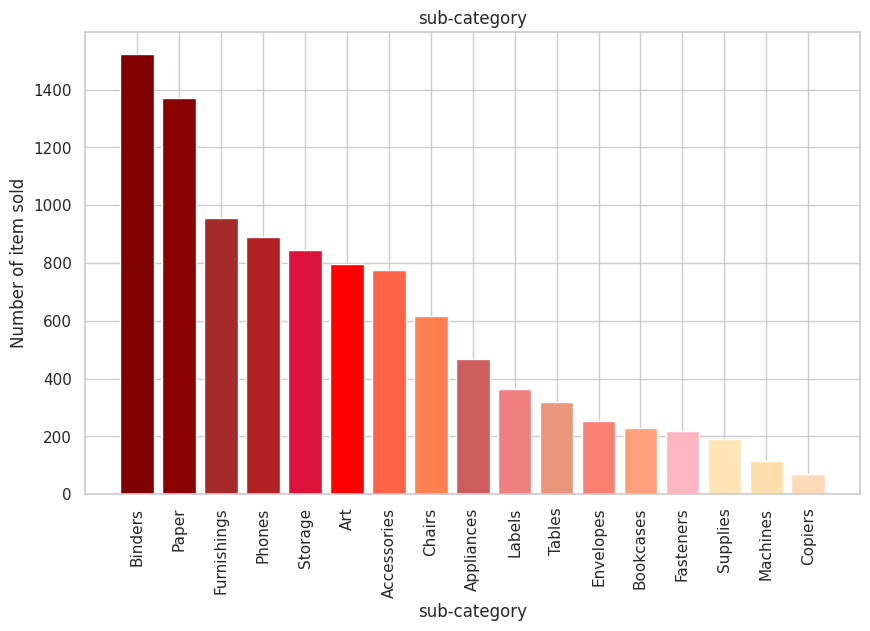

In [80]:
# Let's take a look at the sub-category to better understand the data
subcategory_counts = data['Sub-Category'].value_counts()
custom_palette = ['#800000', '#8B0000', '#A52A2A', '#B22222', '#DC143C', '#FF0000', '#FF6347', '#FF7F50', '#CD5C5C',
                  '#F08080', '#E9967A', '#FA8072', '#FFA07A', '#FFB6C1', '#FFE4B5', '#FFDEAD', '#FFDAB9']

# Create the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.bar(subcategory_counts.index, subcategory_counts.values, color=custom_palette)
plt.xlabel('sub-category')
plt.ylabel('Number of item sold')
plt.title('sub-category')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

***Binders has the most number of sold items***
However, is it making the most sales or profit? Let's find out

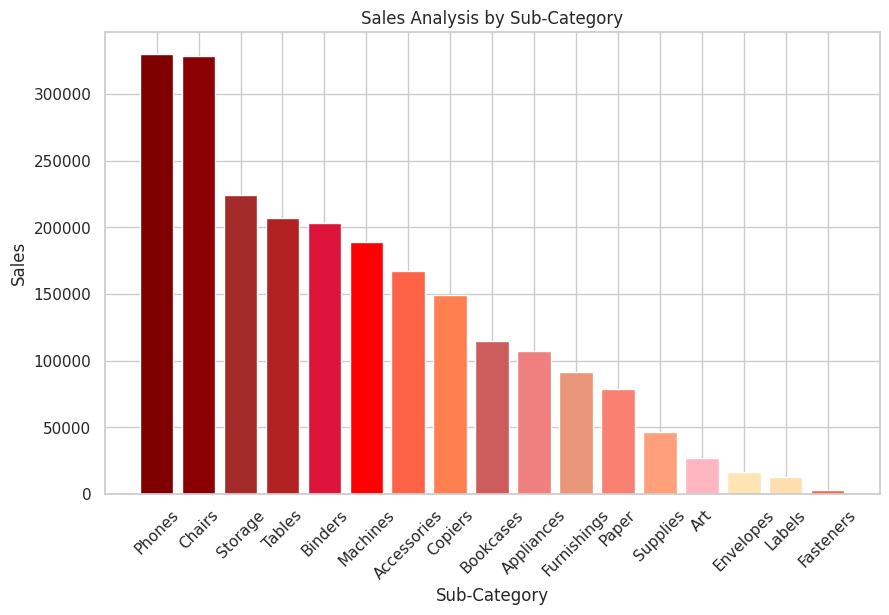

In [81]:
# Sales Analysis by sub-category
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index() # dont forget to reset it

# sorting the order to descending order
sales_by_subcategory = sales_by_subcategory.sort_values(by='Sales', ascending=False)
# apply custom color palette
custom_palette = ['#800000', '#8B0000', '#A52A2A', '#B22222', '#DC143C', '#FF0000', '#FF6347', '#FF7F50', '#CD5C5C',
                  '#F08080', '#E9967A', '#FA8072', '#FFA07A', '#FFB6C1', '#FFE4B5', '#FFDEAD', '#FF6347']

#plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_by_subcategory['Sub-Category'], sales_by_subcategory['Sales'], color=custom_palette)
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Sales Analysis by Sub-Category')
plt.xticks(rotation=45)
plt.show()

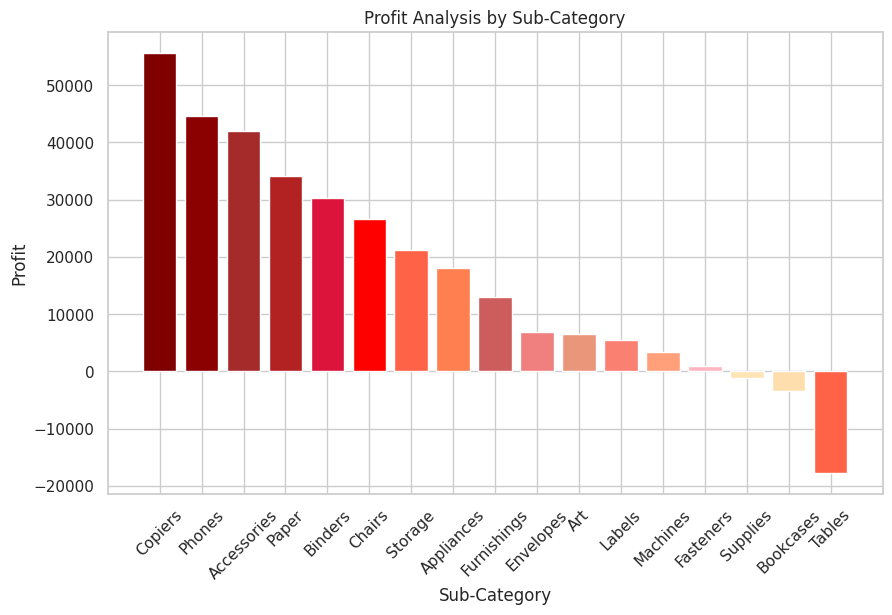

In [82]:
# And we also want to check out the profit analysis
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index() # dont forget to reset it

# sorting the order to descending order
profit_by_subcategory = profit_by_subcategory.sort_values(by='Profit', ascending=False)
# apply custom color palette
custom_palette = ['#800000', '#8B0000', '#A52A2A', '#B22222', '#DC143C', '#FF0000', '#FF6347', '#FF7F50', '#CD5C5C',
                  '#F08080', '#E9967A', '#FA8072', '#FFA07A', '#FFB6C1', '#FFE4B5', '#FFDEAD', '#FF6347']

#plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(profit_by_subcategory['Sub-Category'], profit_by_subcategory['Profit'], color=custom_palette)
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Profit Analysis by Sub-Category')
plt.xticks(rotation=45)
plt.show()

Apperantly selling tables isn't profitable.

Before we move onto our analysis, we would like to look at other columns

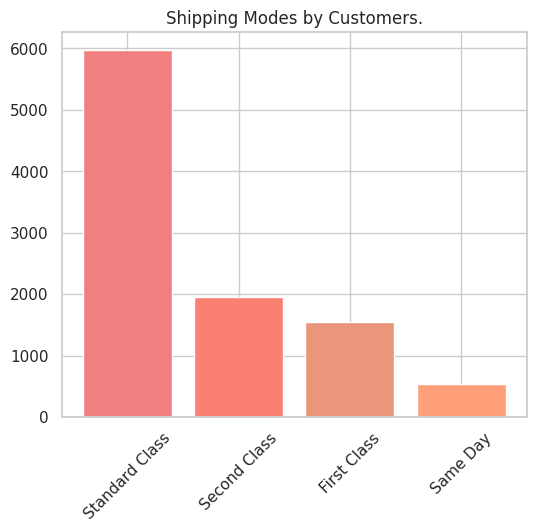

In [27]:
# Have a look at the shipping modes
plt.figure(figsize=(6, 5))

# Getting the counts for each unique value in the "Ship Mode" column
ship_mode_counts = data['Ship Mode'].value_counts()

# Apply custom color palette
custom_palette = ['#F08080', '#FA8072', '#E9967A', '#FFA07A']

# Creating the bar plot with the custom color palette
plt.bar(ship_mode_counts.index, ship_mode_counts.values, color=custom_palette)

plt.title('Shipping Modes by Customers.')
plt.xticks(rotation=45)
plt.show()

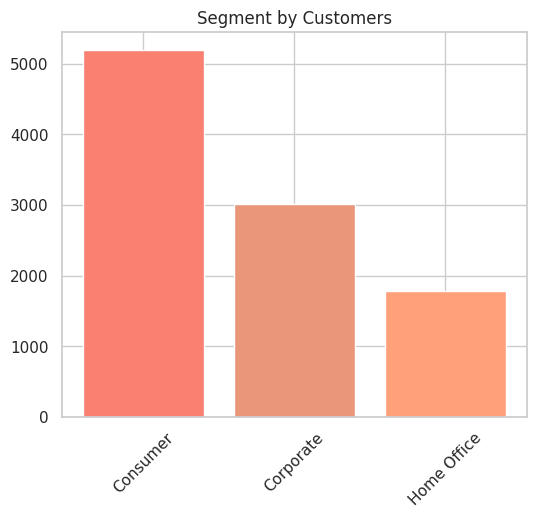

In [28]:
# Have a look at the Segment
plt.figure(figsize=(6, 5))

# Getting the counts for each unique value in the "Segment" column
segment_counts = data['Segment'].value_counts()

# Apply custom color palette
custom_palette = ['#FA8072', '#E9967A', '#FFA07A']

# Creating the bar plot with the custom color palette
plt.bar(segment_counts.index, segment_counts.values, color=custom_palette)

plt.title('Segment by Customers')
plt.xticks(rotation=45)
plt.show()

We are looking for the most profitable product.
But before starting on the modelling, we would like to visualize a little bit more just to get a better look at the dataset

In [29]:
# Some visulization based on the geo-location of the sales
cities_info = data.groupby("City").sum().reset_index()
selected_columns = ["City", "Postal Code", "Sales", "Quantity", "Discount", "Profit"]
cities_info = cities_info.loc[:, selected_columns]
print(cities_info)

            City  Postal Code     Sales  Quantity  Discount     Profit
0       Aberdeen        57401    25.500         3       0.0     6.6300
1        Abilene        79605     1.392         2       0.8    -3.7584
2          Akron       930552  2729.986        65       7.5  -186.6356
3    Albuquerque      1219470  2220.160        65       0.8   634.0881
4     Alexandria       356864  5519.570        84       0.0   318.6183
..           ...          ...       ...       ...       ...        ...
526   Woonsocket        11580   195.550        15       0.0    78.6791
527      Yonkers       160515  7657.666        57       1.0  2767.7557
528         York        87015   817.978        19       2.1  -102.1692
529      Yucaipa        92399    50.800         5       0.0    13.2080
530         Yuma       341456   840.865        22       1.8  -465.9909

[531 rows x 6 columns]


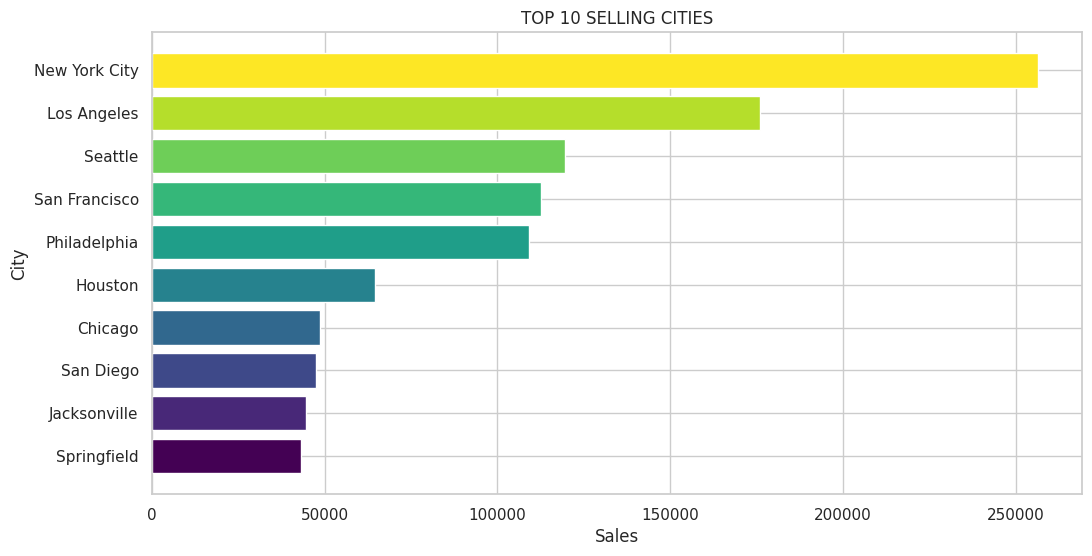

In [30]:
# Some visualization for Sales by city
sorted_cities_info = cities_info.sort_values(by="Sales", ascending=False)

# Top 10
top_10_cities = sorted_cities_info['City'].head(10)
top_10_sales = sorted_cities_info['Sales'].head(10)

# Define the colormap
cmap = plt.cm.viridis

# Create a custom palette by sampling 10 colors from the colormap evenly
custom_palette = [cmap(i) for i in np.linspace(0, 1, 10)]

# Reverse the custom_palette to have the brightest color at the top
custom_palette = custom_palette[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_cities, top_10_sales, color=custom_palette)
plt.xlabel('Sales')
plt.ylabel('City')
plt.title('TOP 10 SELLING CITIES')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest sales at the top
plt.show()


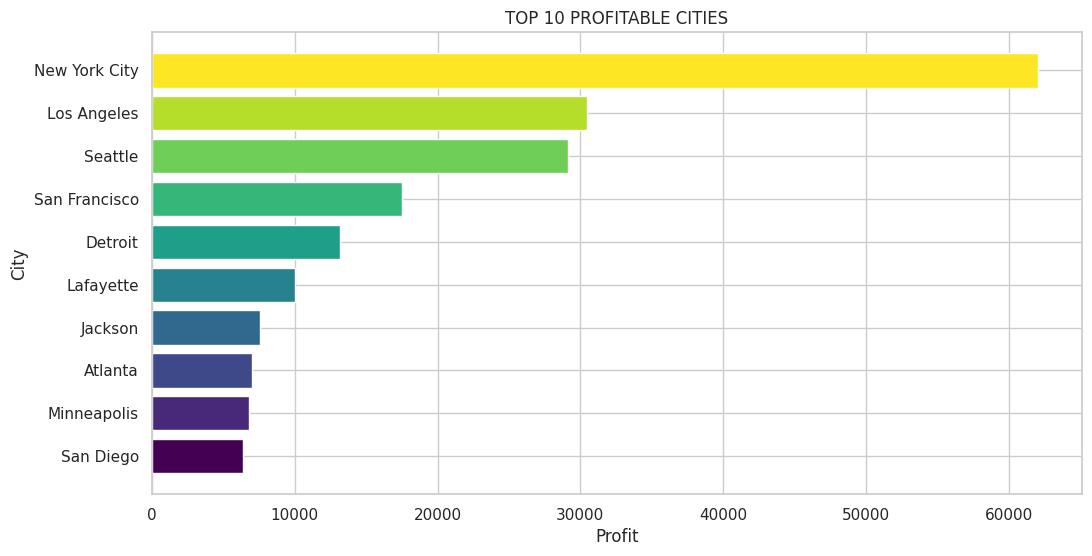

In [31]:
# Some visualization for profit by city
sorted_cities_info = cities_info.sort_values(by="Profit", ascending=False)

# Top 10
top_10_cities = sorted_cities_info['City'].head(10)
top_10_profit = sorted_cities_info['Profit'].head(10)

# Define the colormap
cmap = plt.cm.viridis

# Create a custom palette by sampling 10 colors from the colormap evenly
custom_palette = [cmap(i) for i in np.linspace(0, 1, 10)]

# Reverse the custom_palette to have the brightest color at the top
custom_palette = custom_palette[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_cities, top_10_profit, color=custom_palette)
plt.xlabel('Profit')
plt.ylabel('City')
plt.title('TOP 10 PROFITABLE CITIES')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest profits at the top
plt.show()

In [32]:
# Get the numbers of the top 10 selling cities
top_10_selling_cities = cities_info.nlargest(10, 'Sales')
print(top_10_selling_cities)

              City  Postal Code        Sales  Quantity  Discount      Profit
329  New York City      9168909  256368.1610      3417     51.40  62036.9837
266    Los Angeles     67252887  175851.3410      2879     55.50  30440.7579
452        Seattle     41989758  119540.7420      1590     27.80  29156.0967
438  San Francisco     47998395  112669.0920      1935     34.00  17507.3854
374   Philadelphia     10275302  109077.0130      1981    175.50 -13837.7674
207        Houston     29052387   64504.7604      1466    143.14 -10153.5485
80         Chicago     19037248   48539.5410      1132    120.50  -6654.5688
437      San Diego     15650880   47521.0290       670     13.60   6377.1960
216   Jacksonville      3843200   44713.1830       429     35.85  -2323.8350
464    Springfield      9016357   43054.3420       649     23.20   6200.6974


***We can see that the top 3 selling cities and the top 3 most profitable cities are the same***

***How about states data?***

In [33]:
# Have a look at sales and profit per states
states_info = data.groupby('State').sum().reset_index()
states_info.head()

,State,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,Alabama,243876,2195669,19510.6400,256,0.0,5786.8253,490,122953,215
1,Arizona,1019876,19102126,35282.0010,862,68.0,-3427.9246,1706,451495,636
2,Arkansas,304575,4339309,11678.1300,240,0.0,4008.6871,427,120941,181
3,California,10137449,184382639,457687.6315,7667,145.6,76381.3871,14525,4033452,6335
4,Colorado,797002,14613828,32108.1180,693,57.6,-6527.8579,1337,366875,587


In [34]:
# Sales per state
states_info = states_info.sort_values(by = ['Sales'], ascending = False)
states_info.head(10)

,State,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
3,California,10137449,184382639,457687.6315,7667,145.60,76381.3871,14525,4033452,6335
30,New York,5452096,11835721,310876.2710,4224,62.40,74038.5486,8023,2273750,3458
41,Texas,5085541,75747693,170188.0458,3724,364.64,-25729.3563,7083,1985440,3109
45,Washington,2584458,49661687,138641.2700,1883,32.40,33402.6517,3683,1020048,1507
36,Pennsylvania,2768523,11190565,116511.9140,2153,192.90,-15559.9603,4119,1183222,1767
8,Florida,1958255,12640225,89473.7080,1379,114.65,-3399.3017,2843,771997,1230
11,Illinois,2571481,29873772,80166.1010,1845,191.90,-12607.8870,3478,991740,1427
33,Ohio,2355994,20579836,78258.1360,1759,152.40,-16971.3766,3462,945396,1416
20,Michigan,1200167,12356103,76269.6140,946,1.80,24463.1876,1840,513982,762
44,Virginia,1218137,5124335,70636.7200,893,0.00,18597.9504,1462,451437,683


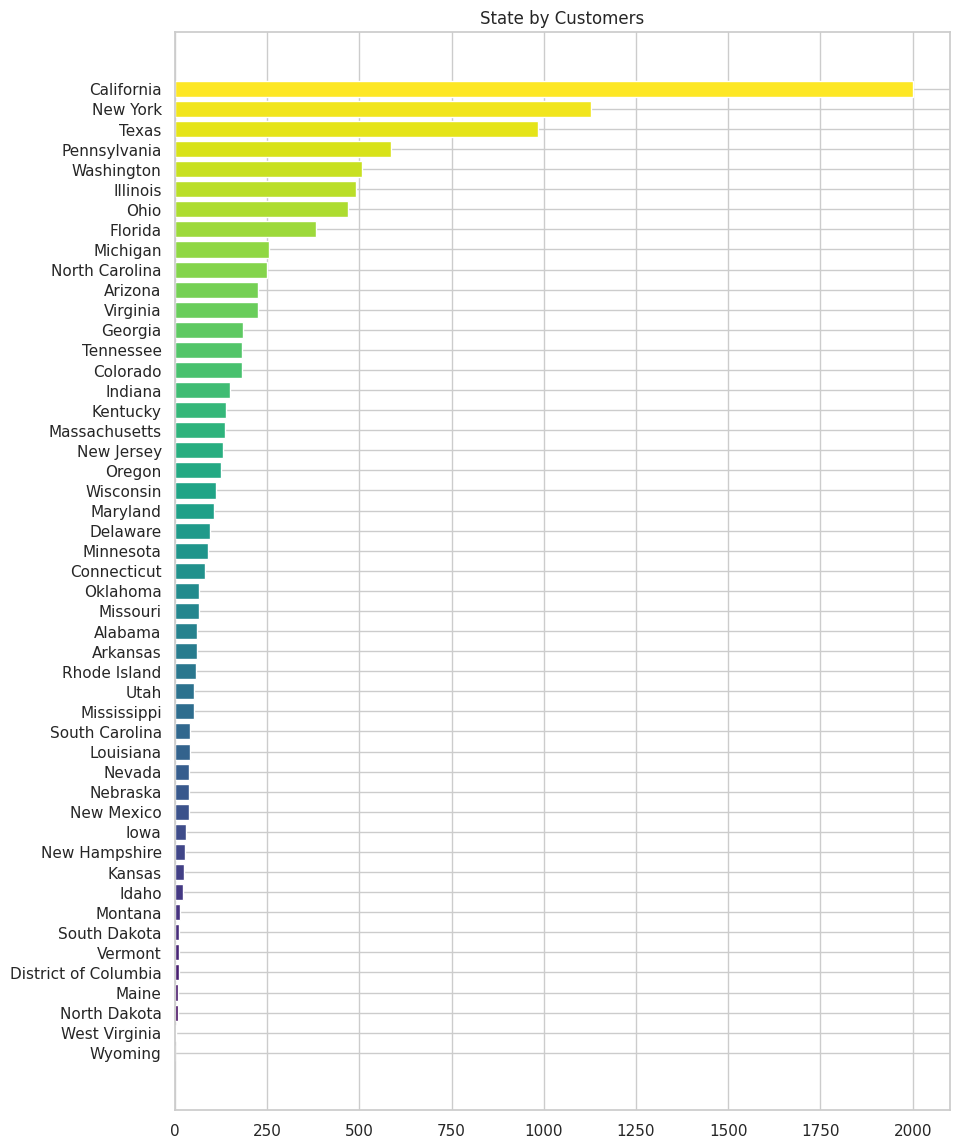

In [83]:
# Have a look at State # Because there are only 49 states in the dataset, so we will be showing all of them
plt.figure(figsize=(10, 14))

# Getting the counts for each unique value in the "State" column
state_counts = data['State'].value_counts(ascending=True)

# Define the colormap
cmap = plt.cm.viridis

# Create a custom palette by sampling 49 colors from the colormap evenly
custom_palette = [cmap(i) for i in np.linspace(0, 1, 49)]

# If there are more than 49 states, repeat the colors
colors = custom_palette * (len(state_counts) // 49) + custom_palette[:len(state_counts) % 49]

# Creating the bar plot with the custom color palette
plt.barh(state_counts.index, state_counts.values, color=colors)

plt.title('State by Customers')
plt.show()


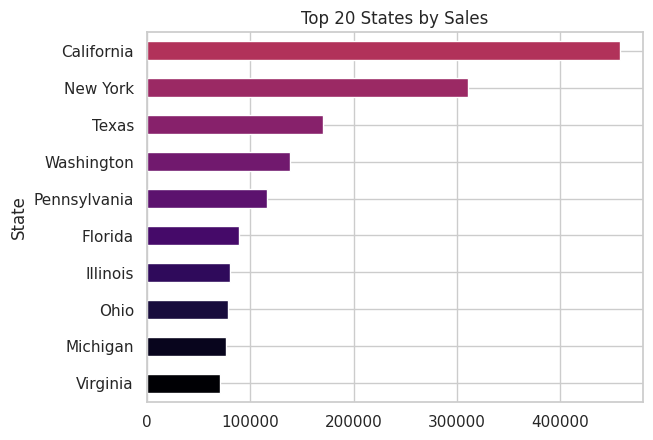

In [88]:
# The previous map is too big so we just show the top 10 for Sales and Profit
# Define the colormap
cmap = plt.cm.inferno

# Create a custom palette by sampling 20 colors from the colormap evenly
colors = [cmap(i) for i in np.linspace(0, 1, 20)]

# Plot the data
data.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors)

# Add a title
plt.title('Top 20 States by Sales')

# Display the plot
plt.show()




In [37]:
# Profit per states
states_info = states_info.sort_values(by = ['Profit'], ascending = False)
states_info.head()

,State,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
3,California,10137449,184382639,457687.6315,7667,145.6,76381.3871,14525,4033452,6335
30,New York,5452096,11835721,310876.2710,4224,62.4,74038.5486,8023,2273750,3458
45,Washington,2584458,49661687,138641.2700,1883,32.4,33402.6517,3683,1020048,1507
20,Michigan,1200167,12356103,76269.6140,946,1.8,24463.1876,1840,513982,762
44,Virginia,1218137,5124335,70636.7200,893,0.0,18597.9504,1462,451437,683


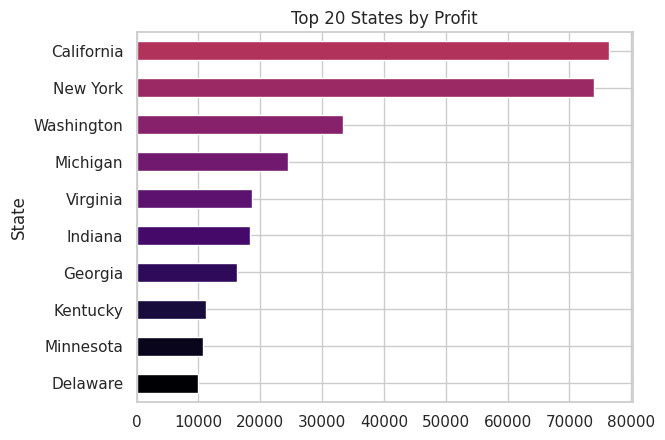

In [85]:
# Define the colormap
cmap = plt.cm.inferno

# Create a custom palette by sampling 20 colors from the colormap evenly
colors = [cmap(i) for i in np.linspace(0, 1, 20)]

# Plot the data for Profit
data.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors)

# Add a title
plt.title('Top 20 States by Profit')

# Display the plot
plt.show()

The No.1 state is apparently California

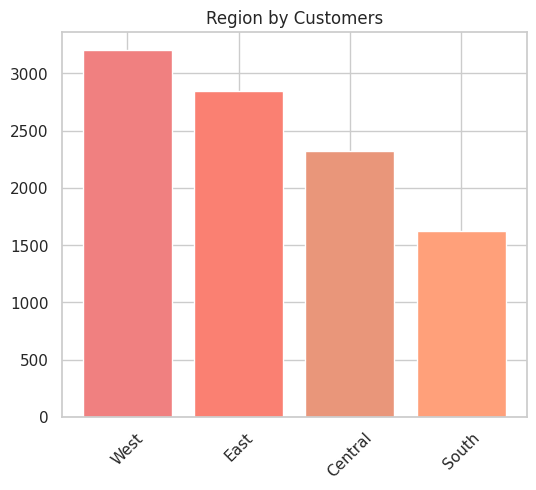

In [39]:
# Lastly have a quick look at the region
plt.figure(figsize=(6, 5))

# Getting the counts for each unique value in the "Region" column
region_counts = data['Region'].value_counts()

# apply custom color palette
custom_palette = ['#F08080', '#FA8072', '#E9967A', '#FFA07A']

# Creating the bar plot with the custom color palette
plt.bar(region_counts.index, region_counts.values, color=custom_palette)

plt.title('Region by Customers')
plt.xticks(rotation=45)
plt.show()

# Part 2 Predictive Model

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Ship Date          9994 non-null   datetime64[ns]
 4   Ship Mode          9994 non-null   object        
 5   Customer ID        9994 non-null   object        
 6   Segment            9994 non-null   object        
 7   City               9994 non-null   object        
 8   State              9994 non-null   object        
 9   Postal Code        9994 non-null   int64         
 10  Region             9994 non-null   object        
 11  Product ID         9994 non-null   object        
 12  Category           9994 non-null   category      
 13  Sub-Category       9994 non-null   object        
 14  Product 

In [41]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
# Create a list of columns to be dropped from the DataFrame
columns_to_drop = ['Row ID', 'Order ID', 'City', 'Ship Date', 'Customer ID', 'Postal Code', 'Product ID', 'Product Name']


# Drop the specified columns from the DataFrame using the 'drop' method
# 'axis=1' specifies that the operation should be performed along columns (i.e., drop columns)
# The resulting DataFrame is stored in a new variable 'data_filtered'
data_filtered = data.drop(columns=columns_to_drop)


# Print the first few rows
print(data_filtered.head())

  Order Date       Ship Mode    Segment       State Region         Category  \
0 2016-08-11    Second Class   Consumer    Kentucky  South        Furniture   
1 2016-08-11    Second Class   Consumer    Kentucky  South        Furniture   
2 2016-12-06    Second Class  Corporate  California   West  Office Supplies   
3 2015-11-10  Standard Class   Consumer     Florida  South        Furniture   
4 2015-11-10  Standard Class   Consumer     Florida  South  Office Supplies   

  Sub-Category     Sales  Quantity  Discount    Profit  Order Month  \
0    Bookcases  261.9600         2      0.00   41.9136            8   
1       Chairs  731.9400         3      0.00  219.5820            8   
2       Labels   14.6200         2      0.00    6.8714           12   
3       Tables  957.5775         5      0.45 -383.0310           11   
4      Storage   22.3680         2      0.20    2.5164           11   

   Order Year  Order Day of Week  
0        2016                  3  
1        2016               

In [43]:
data_filtered.head()

,Order Date,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,2016-08-11,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,8,2016,3
1,2016-08-11,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,8,2016,3
2,2016-12-06,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,12,2016,1
3,2015-11-10,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,11,2015,1
4,2015-11-10,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11,2015,1


In [84]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


y = data_filtered['Profit']

# Select all columns except 'Profit' as features
X = data_filtered.drop(columns=['Profit'])

# Drop datetime columns if present
X = X.select_dtypes(exclude=['datetime64'])

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=3)

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features in the testing set using the same scaler
X_test_scaled = scaler.transform(X_test)

# SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_predictions = svr_model.predict(X_test_scaled)

# Evaluate
r2 = r2_score(y_test, svr_predictions)
print("SVR - R-squared:", r2)


SVR - R-squared: 0.023179924434542754


In [67]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

y = data_filtered['Profit']
X = data_filtered.drop(columns=['Profit'])

X = X.select_dtypes(exclude=['datetime64'])

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for SVR hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

# Create the SVR model
svr_model = SVR()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr_model, param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters for SVR:")
print(best_params)

# Make predictions using the best model
svr_predictions = best_model.predict(X_test_scaled)

# Evaluate the SVR model
r2_score_svr = r2_score(y_test, svr_predictions)
print("SVR - R-squared:", r2_score_svr)


Best Hyperparameters for SVR:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVR - R-squared: 0.5231502354862178


After hyper tuning, it still doesn't look good, so I'm trying a different model.

In [68]:
from sklearn.ensemble import RandomForestRegressor


# target variable
y = data_filtered['Profit']

# Select all columns except 'Profit'
X = data_filtered.drop(columns=['Profit'])

# Drop datetime columns if present
X = X.select_dtypes(exclude=['datetime64'])

# Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=3)

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features in the testing set using the same scaler
X_test_scaled = scaler.transform(X_test)

# Modeling using Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest Regressor model
r2 = r2_score(y_test, rf_predictions)
print("Random Forest Regressor - R-squared:", r2)



Random Forest Regressor - R-squared: 0.8186177108629908


In [69]:
# Hyper tun

y = data_filtered['Profit']
X = data_filtered.drop(columns=['Profit'])


X = X.select_dtypes(exclude=['datetime64'])
X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling using Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best model with the tuned hyperparameters
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
rf_predictions = best_rf_model.predict(X_test_scaled)

# Evaluate the Random Forest Regressor model
r2 = r2_score(y_test, rf_predictions)
print("Best Hyperparameters for Random Forest Regressor:")
print(grid_search.best_params_)
print("Random Forest Regressor - R-squared:", r2)


Best Hyperparameters for Random Forest Regressor:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Regressor - R-squared: 0.8314006718255524


***Random Forest looks promising***
An R-squared value of 0.831 means that approximately ***83.1%*** of the variability in the Profit can be explained by the Random Forest Regressor model. The model does a good job of predicting the target variable based on the given features

# Part 4 Answering the business question
Identify which product sub-categories are more profitable

In [71]:
# Drop the specified columns from the DataFrame
# 'axis=1' specifies that the operation should be performed along columns
# The resulting DataFrame is stored in a new variable 'data_filtered'
data_filtered = data.drop(columns=columns_to_drop)

# Drop the 'Order Date' column from the filtered DataFrame
data_filtered = data_filtered.drop(columns=['Order Date'])

# Print the first few rows of the filtered DataFrame to check the result
print(data_filtered.head())

# Profit is the target variable
y = data_filtered['Profit']
X = data_filtered.drop(columns=['Profit'])
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale the features in the testing set using the same scaler
X_scaled = scaler.transform(X_encoded)  # Use the previously defined scaler

# Make predictions
predicted_profits = best_rf_model.predict(X_scaled)

# Combine the predicted profits with the original DataFrame
data_filtered['Predicted Profit'] = predicted_profits

# Group the data by 'Sub-Category' and calculate the mean predicted profit for each sub-category
sub_category_profit = data_filtered.groupby('Sub-Category')['Predicted Profit'].mean()

# Sort the sub-categories based on their mean predicted profit in descending order
most_profitable_subcategories = sub_category_profit.sort_values(ascending=False)

# Print the most profitable sub-categories
print(most_profitable_subcategories)



        Ship Mode    Segment       State Region         Category Sub-Category  \
0    Second Class   Consumer    Kentucky  South        Furniture    Bookcases   
1    Second Class   Consumer    Kentucky  South        Furniture       Chairs   
2    Second Class  Corporate  California   West  Office Supplies       Labels   
3  Standard Class   Consumer     Florida  South        Furniture       Tables   
4  Standard Class   Consumer     Florida  South  Office Supplies      Storage   

      Sales  Quantity  Discount    Profit  Order Month  Order Year  \
0  261.9600         2      0.00   41.9136            8        2016   
1  731.9400         3      0.00  219.5820            8        2016   
2   14.6200         2      0.00    6.8714           12        2016   
3  957.5775         5      0.45 -383.0310           11        2015   
4   22.3680         2      0.20    2.5164           11        2015   

   Order Day of Week  
0                  3  
1                  3  
2                  1  


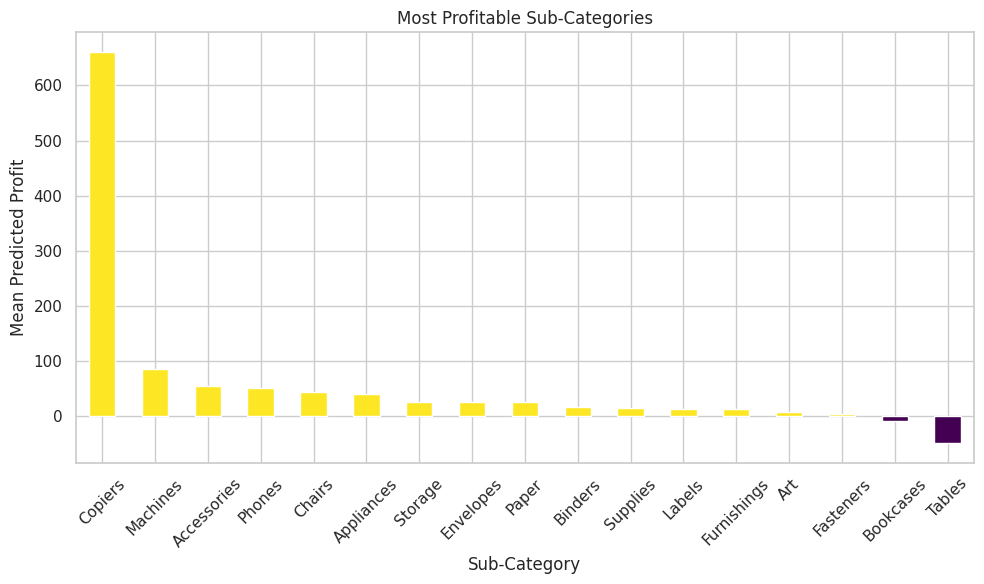

In [79]:
# plot
plt.figure(figsize=(10, 6))
most_profitable_subcategories.plot(kind='bar', color=plt.cm.viridis(most_profitable_subcategories.values))
plt.xlabel('Sub-Category')
plt.ylabel('Mean Predicted Profit')
plt.title('Most Profitable Sub-Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
# The below code is just for fun - does shipping method effect our sales?
import scipy.stats as stats
y = data_filtered['Profit']
ship_mode_sales = data_filtered[['Ship Mode', 'Sales']]

# Calculate the means of sales for each ship mode category
means = ship_mode_sales.groupby('Ship Mode')['Sales'].mean()

# ANOVA-test for significant differences
# The null hypothesis is that there is no significant difference between the means
# If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis
result = stats.f_oneway(*[ship_mode_sales[ship_mode_sales['Ship Mode'] == mode]['Sales'] for mode in means.index])

# Print the means and ANOVA results
print("Mean Sales by Ship Mode:")
print(means)
print("\nANOVA results:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)


Mean Sales by Ship Mode:
Ship Mode
First Class       228.497024
Same Day          236.396179
Second Class      236.089239
Standard Class    227.583067
Name: Sales, dtype: float64

ANOVA results:
F-statistic: 0.11364679621356466
p-value: 0.9521512276648911


P-value is greater than the 0.05, we do not have enough evidence to reject the null hypothesis. THerefore, we cannot say for sure that the shipping method has any impact on sales.